In [1]:
import pandas as pd
df=pd.read_csv("../input/diamonds-prices/Diamonds Prices2022.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df.isnull().any()

Unnamed: 0    False
carat         False
cut           False
color         False
clarity       False
depth         False
table         False
price         False
x             False
y             False
z             False
dtype: bool

In [3]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["cut"]=le.fit_transform(df["cut"])
df["color"]=le.fit_transform(df["color"])
df["clarity"]=le.fit_transform(df["clarity"])
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [5]:
x=df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]
y=df['price']
import numpy as np
x=np.array(x)
y=np.array(y).reshape(-1,1)


In [6]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
xsc=sc.fit_transform(x)
ysc=sc.fit_transform(y)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xsc,ysc,test_size=0.3,random_state=1)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
from sklearn.metrics import mean_absolute_error
y_pred=model.predict(x_test)
mean_absolute_error(y_test,y_pred)

0.04612578084465609

In [8]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=1)
regressor.fit(x_train,y_train)
ypred=regressor.predict(x_train)
mean_absolute_error(y_test,y_pred)


0.04612578084465609

In [9]:
from sklearn.model_selection import cross_validate,ShuffleSplit
cv=ShuffleSplit(n_splits=40,test_size=0.3,random_state=1)
cv_results=cross_validate(regressor,xsc,ysc,cv=cv,scoring="neg_mean_absolute_error")
cvresults=pd.DataFrame(cv_results)
cvresults['test_score']=-cvresults["test_score"]
cvresults


,fit_time,score_time,test_score
0,0.242723,0.007315,0.019866
1,0.256131,0.007335,0.020185
2,0.239096,0.007639,0.020022
3,0.278855,0.007708,0.019833
4,0.237227,0.007368,0.019591
5,0.238738,0.007272,0.019825
6,0.240036,0.007080,0.019935
7,0.240676,0.007368,0.019600
8,0.242993,0.007210,0.019460
9,0.237555,0.007428,0.019688


In [10]:
m=cvresults.test_score.mean()
s=cvresults.test_score.std()

In [11]:
m+s,m-s 

(0.02001278366619562, 0.019535205265514992)

<AxesSubplot:ylabel='Frequency'>

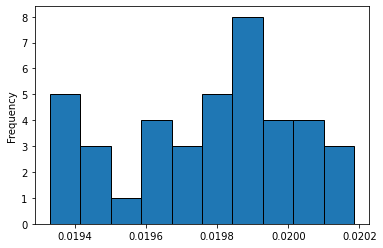

In [12]:
import matplotlib.pyplot as plt
cvresults["test_score"].plot.hist(bins=10,edgecolor='black')


<AxesSubplot:ylabel='Frequency'>

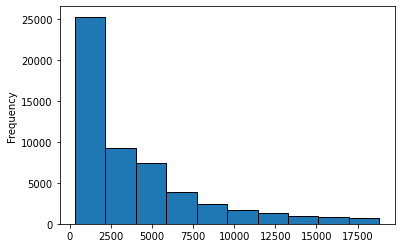

In [13]:
df.price.plot.hist(bins=10,edgecolor='black')

In [14]:
df.price.mean(),df.price.std()

(3932.734293606214, 3989.3384468242402)

In [15]:
cv1=ShuffleSplit(n_splits=40,test_size=0.3,random_state=1)
cv1_results=cross_validate(model,xsc,ysc,cv=cv1,scoring="neg_mean_absolute_error")
cv1_results=pd.DataFrame(cv1_results)

In [16]:
cv1_results.head()

,fit_time,score_time,test_score
0,0.017405,0.003318,-0.046126
1,0.033545,0.001526,-0.046243
2,0.034407,0.001571,-0.046852
3,0.038248,0.001560,-0.047085
4,0.034755,0.004866,-0.046762


In [17]:
cv1_results["test_score"]=-cv1_results["test_score"]
score=cv1_results["test_score"]
rr=score.mean()
ss=score.std()
rr,ss


(0.046643392412509734, 0.00029543539939025837)

<AxesSubplot:ylabel='Frequency'>

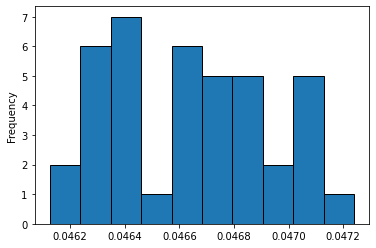

In [18]:
cv1_results["test_score"].plot.hist(bins=10,edgecolor="black")

In [19]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=20,random_state=0)
forest.fit(x_train,y_train)
yfor=forest.predict(x_test)
mean_absolute_error(y_test,yfor)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.015142132573901722

In [20]:
cv2=ShuffleSplit(n_splits=40,test_size=0.3,random_state=1)
cv2_result=cross_validate(forest,xsc,ysc,cv=cv2,scoring="neg_mean_absolute_error")
cv2result=pd.DataFrame(cv2_result)
cv2result

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

,fit_time,score_time,test_score
0,2.951873,0.114383,-0.015142
1,2.939365,0.115200,-0.015484
2,2.980684,0.116896,-0.015069
3,2.934465,0.114099,-0.015250
4,2.939725,0.114767,-0.015219
5,2.947096,0.113620,-0.015284
6,2.946182,0.114403,-0.015153
7,3.015877,0.114446,-0.015224
8,2.924253,0.115650,-0.015006
9,2.953465,0.113122,-0.014948


In [21]:
cv2result["test_score"]=-cv2result["test_score"]
cv2result["test_score"]

0     0.015142
1     0.015484
2     0.015069
3     0.015250
4     0.015219
5     0.015284
6     0.015153
7     0.015224
8     0.015006
9     0.014948
10    0.015268
11    0.015066
12    0.015269
13    0.015178
14    0.014919
15    0.015061
16    0.014660
17    0.014872
18    0.015254
19    0.014823
20    0.015303
21    0.015086
22    0.015275
23    0.015291
24    0.015309
25    0.014905
26    0.015210
27    0.015231
28    0.014973
29    0.015190
30    0.015018
31    0.015003
32    0.015123
33    0.015258
34    0.015245
35    0.014994
36    0.015458
37    0.014946
38    0.015122
39    0.015250
Name: test_score, dtype: float64

In [22]:
forest_mean=cv2result['test_score'].mean()
forest_std=cv2result["test_score"].std()
forest_mean,forest_std

(0.015133353577222942, 0.0001726846421647283)

<AxesSubplot:ylabel='Frequency'>

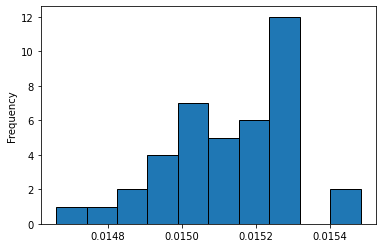

In [23]:
cv2result['test_score'].plot.hist(bins=10,edgecolor='black')